

Ep. 7 - Marketing Mix Modeling: Auto-tuning Diminishing Returns and Adstock with Excel Solver

https://www.youtube.com/watch?v=hC0CKNjv9SM



https://docs.google.com/spreadsheets/d/1FjXCiEI1yXUA825rkt-Hg_9Ry_dcI1YrkmxLYSJBhT0/edit?pli=1&gid=518075327#gid=518075327


metodo automático para diminuir o retorno do adstock

# Criando um simulador 

In [18]:
import pandas as pd
# Ler a primeira aba (índice 0)
df = pd.read_excel('../MARKETING MIX MODELING YT.xlsx', sheet_name=0)

df



,Time,sales,FB,TV,Radio,Date
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10


# transformar a variável input em um adstock transform return. 

# Adstock(t)= Adstock (t-1)*beta+ Spent(t)

# Dim Ret = Adstock(t) ^Alpha

# Transf. = (adstock(t-1)*beta+spent(t))^alpha

usando a linear regressão

In [19]:
calculo_4 = df.copy()

calculo_4['FB_Transf'] =0.0
calculo_4['TV_Transf'] =0.0
calculo_4['Radio_transf'] =0.0

import statsmodels.api as sm
import numpy as np


Alpha= 0.5
Beta = 0.2
Alpha_tv= 0.7 # diminuimos um pouco
Beta_tv = 0.1
Alpha_radio= 0.3  # diminuimos um pouco
Beta_radio = 0.2

calculo_4.loc[0,'TV_Transf'] = calculo_4.loc[0,'TV'] **Alpha_tv
calculo_4.loc[0,'Radio_transf'] = calculo_4.loc[0,'Radio'] **Alpha_radio
calculo_4.loc[0,'FB_Transf'] = calculo_4.loc[0,'FB'] **Alpha


for i in range(len(calculo_4) - 1):  # Adjusted to avoid going out of bounds
    calculo_4.loc[i + 1, 'FB_Transf'] = (calculo_4.loc[i, 'FB_Transf'] * Beta + calculo_4.loc[i + 1, 'FB']) ** Alpha
    calculo_4.loc[i + 1, 'TV_Transf'] = (calculo_4.loc[i, 'TV_Transf'] * Beta_tv + calculo_4.loc[i + 1, 'TV']) ** Alpha_tv
    calculo_4.loc[i + 1, 'Radio_transf'] = (calculo_4.loc[i, 'Radio_transf'] * Beta_radio + calculo_4.loc[i + 1, 'Radio']) ** Alpha_radio

# Definindo a variável dependente e as variáveis independentes
X = calculo_4[['FB_Transf', 'TV_Transf', 'Radio_transf']]  # Variáveis independentes
y = calculo_4['sales']  # Variável dependente

# Adicionando uma constante para o modelo
X = sm.add_constant(X)

# Criando o modelo de regressão
model = sm.OLS(y, X).fit()

# Imprimindo o resumo da regressão
print(model.summary())
# Obter o intercepto
intercept = model.params[0]  # O primeiro valor é o intercepto
print(f"Intercept: {intercept:.2f}")


# Obter e imprimir os coeficientes
coeficientes = model.params
print("\nCoeficientes do modelo:")
for variable, coef in coeficientes.items():
    print(f"{variable}: {coef:.2f}")
coeficientes_4 = model.params.to_dict()  # Converte os coeficientes para dicionário
print(coeficientes_4)
# Obter o valor de R²
r_squared = model.rsquared
print(f"R²: {r_squared:.5f}")

# Calcular o RMSE
predictions = model.predict(X)  # Previsões do modelo
rmse = np.sqrt(np.mean((predictions - y) ** 2))  # RMSE
print(f"RMSE: {rmse:.5f}")
print()
display(calculo_4)



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.40e-14
Time:                        18:51:45   Log-Likelihood:                -51.639
No. Observations:                  30   AIC:                             111.3
Df Residuals:                      26   BIC:                             116.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.8886      1.388     -1.361   

/tmp/ipykernel_18337/3339491553.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]  # O primeiro valor é o intercepto


,Time,sales,FB,TV,Radio,Date,FB_Transf,TV_Transf,Radio_transf
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,15.169047,12.712889,3.564773
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,6.894477,13.358361,3.149898
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,4.310324,14.859019,3.576012
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,12.343503,13.864700,3.401966
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,13.537677,5.755917,3.399641
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,3.377504,15.348774,3.661797
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,7.627287,11.885429,2.602068
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,11.032926,8.365210,2.113758
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,3.287337,2.125608,1.111575
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,14.158300,2.062393,2.507610


In [20]:
calculo_4 = df.copy()

calculo_4['FB_Transf'] =0.0
calculo_4['TV_Transf'] =0.0
calculo_4['Radio_transf'] =0.0

import statsmodels.api as sm
import numpy as np


Alpha= 0.1
Beta = 1
Alpha_tv= 0.1 # diminuimos um pouco
Beta_tv = 1
Alpha_radio= 0.1  # diminuimos um pouco
Beta_radio = 1

calculo_4.loc[0,'TV_Transf'] = calculo_4.loc[0,'TV'] **Alpha_tv
calculo_4.loc[0,'Radio_transf'] = calculo_4.loc[0,'Radio'] **Alpha_radio
calculo_4.loc[0,'FB_Transf'] = calculo_4.loc[0,'FB'] **Alpha


for i in range(len(calculo_4) - 1):  # Adjusted to avoid going out of bounds
    calculo_4.loc[i + 1, 'FB_Transf'] = (calculo_4.loc[i, 'FB_Transf'] * Beta + calculo_4.loc[i + 1, 'FB']) ** Alpha
    calculo_4.loc[i + 1, 'TV_Transf'] = (calculo_4.loc[i, 'TV_Transf'] * Beta_tv + calculo_4.loc[i + 1, 'TV']) ** Alpha_tv
    calculo_4.loc[i + 1, 'Radio_transf'] = (calculo_4.loc[i, 'Radio_transf'] * Beta_radio + calculo_4.loc[i + 1, 'Radio']) ** Alpha_radio

# Definindo a variável dependente e as variáveis independentes
X = calculo_4[['FB_Transf', 'TV_Transf', 'Radio_transf']]  # Variáveis independentes
y = calculo_4['sales']  # Variável dependente

# Adicionando uma constante para o modelo
X = sm.add_constant(X)

# Criando o modelo de regressão
model = sm.OLS(y, X).fit()

# Imprimindo o resumo da regressão
print(model.summary())
# Obter o intercepto
intercept = model.params[0]  # O primeiro valor é o intercepto
print(f"Intercept: {intercept:.2f}")


# Obter e imprimir os coeficientes
coeficientes = model.params
print("\nCoeficientes do modelo:")
for variable, coef in coeficientes.items():
    print(f"{variable}: {coef:.2f}")
coeficientes_4 = model.params.to_dict()  # Converte os coeficientes para dicionário
print(coeficientes_4)
# Obter o valor de R²
r_squared = model.rsquared
print(f"R²: {r_squared:.5f}")

# Calcular o RMSE
predictions = model.predict(X)  # Previsões do modelo
rmse = np.sqrt(np.mean((predictions - y) ** 2))  # RMSE
print(f"RMSE: {rmse:.5f}")
print()
display(calculo_4)



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     62.05
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           5.54e-12
Time:                        18:51:45   Log-Likelihood:                -58.568
No. Observations:                  30   AIC:                             125.1
Df Residuals:                      26   BIC:                             130.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -60.2382      6.178     -9.750   

/tmp/ipykernel_18337/50800573.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]  # O primeiro valor é o intercepto


,Time,sales,FB,TV,Radio,Date,FB_Transf,TV_Transf,Radio_transf
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,1.722629,1.437968,1.527603
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,1.467187,1.448772,1.468467
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,1.340010,1.470723,1.531031
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,1.653574,1.455843,1.506044
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,1.683121,1.284796,1.505730
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,1.263667,1.479303,1.543012
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,1.502834,1.423978,1.379967
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,1.616330,1.356037,1.292193
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,1.261623,1.132030,1.086488
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,1.699546,1.140761,1.363968


In [21]:
calculo_4 = df.copy()

calculo_4['FB_Transf'] =0.0
calculo_4['TV_Transf'] =0.0
calculo_4['Radio_transf'] =0.0

import statsmodels.api as sm
import numpy as np


Alpha= 1
Beta = 0.05
Alpha_tv= 1 # diminuimos um pouco
Beta_tv = 0.5
Alpha_radio= 1  # diminuimos um pouco
Beta_radio = 0.5

calculo_4.loc[0,'TV_Transf'] = calculo_4.loc[0,'TV'] **Alpha_tv
calculo_4.loc[0,'Radio_transf'] = calculo_4.loc[0,'Radio'] **Alpha_radio
calculo_4.loc[0,'FB_Transf'] = calculo_4.loc[0,'FB'] **Alpha


for i in range(len(calculo_4) - 1):  # Adjusted to avoid going out of bounds
    calculo_4.loc[i + 1, 'FB_Transf'] = (calculo_4.loc[i, 'FB_Transf'] * Beta + calculo_4.loc[i + 1, 'FB']) ** Alpha
    calculo_4.loc[i + 1, 'TV_Transf'] = (calculo_4.loc[i, 'TV_Transf'] * Beta_tv + calculo_4.loc[i + 1, 'TV']) ** Alpha_tv
    calculo_4.loc[i + 1, 'Radio_transf'] = (calculo_4.loc[i, 'Radio_transf'] * Beta_radio + calculo_4.loc[i + 1, 'Radio']) ** Alpha_radio

# Definindo a variável dependente e as variáveis independentes
X = calculo_4[['FB_Transf', 'TV_Transf', 'Radio_transf']]  # Variáveis independentes
y = calculo_4['sales']  # Variável dependente

# Adicionando uma constante para o modelo
X = sm.add_constant(X)

# Criando o modelo de regressão
model = sm.OLS(y, X).fit()

# Imprimindo o resumo da regressão
print(model.summary())
# Obter o intercepto
intercept = model.params[0]  # O primeiro valor é o intercepto
print(f"Intercept: {intercept:.2f}")


# Obter e imprimir os coeficientes
coeficientes = model.params
print("\nCoeficientes do modelo:")
for variable, coef in coeficientes.items():
    print(f"{variable}: {coef:.2f}")
coeficientes_4 = model.params.to_dict()  # Converte os coeficientes para dicionário
print(coeficientes_4)
# Obter o valor de R²
r_squared = model.rsquared
print(f"R²: {r_squared:.5f}")

# Calcular o RMSE
predictions = model.predict(X)  # Previsões do modelo
rmse = np.sqrt(np.mean((predictions - y) ** 2))  # RMSE
print(f"RMSE: {rmse:.5f}")
print()
display(calculo_4)



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     45.64
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.68e-10
Time:                        18:51:45   Log-Likelihood:                -62.527
No. Observations:                  30   AIC:                             133.1
Df Residuals:                      26   BIC:                             138.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1261      1.333      0.845   

/tmp/ipykernel_18337/628379024.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]  # O primeiro valor é o intercepto


,Time,sales,FB,TV,Radio,Date,FB_Transf,TV_Transf,Radio_transf
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,230.100000,37.800000,69.200000
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,56.005000,58.200000,79.700000
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,20.000250,75.000000,109.150000
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,152.500012,78.800000,113.075000
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,188.425001,50.200000,114.937500
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,18.121250,74.000000,132.468750
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,58.406063,69.800000,89.734375
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,123.120303,54.500000,56.467188
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,14.756015,29.350000,29.233594
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,200.537801,17.275000,35.816797


automatizar e maximizar o R²

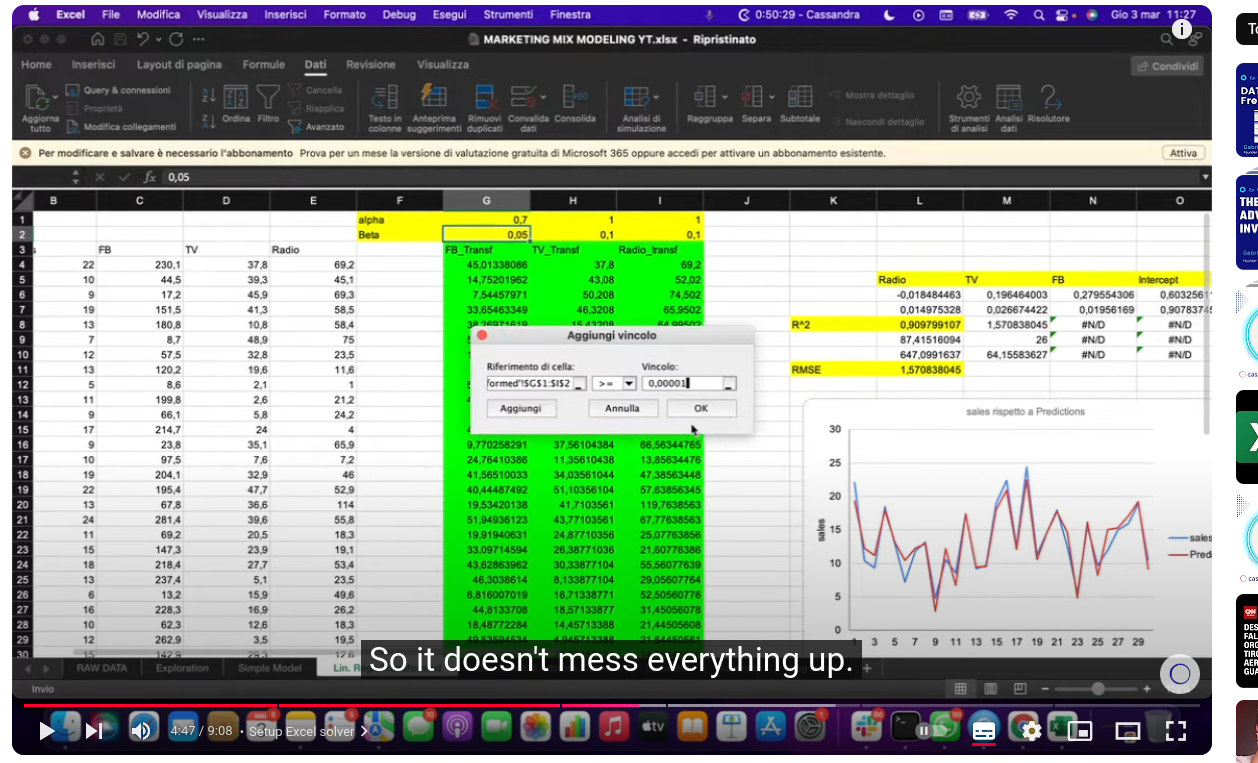

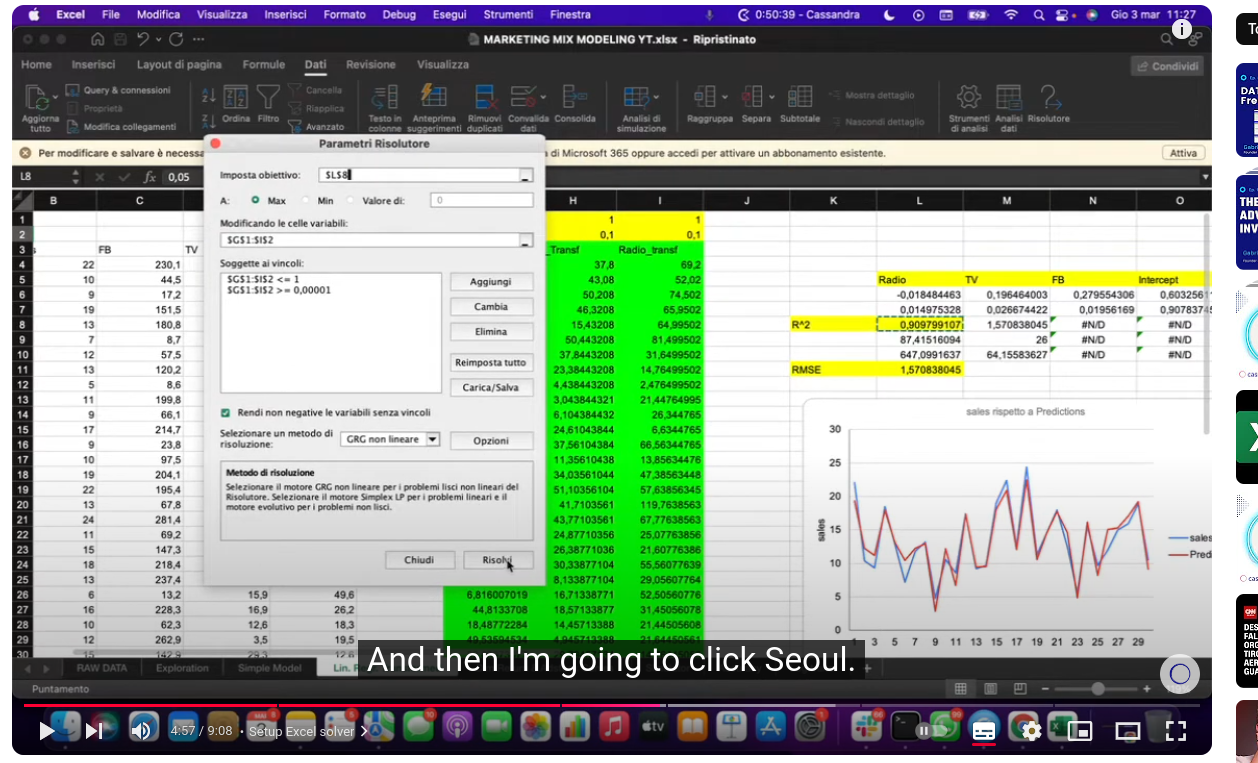

maximar o valor

quero maximar o valor do alpha e do beta com base no R²

os valores de alpha terão que ser menores ou iguais à 1
e as betas maiores que 0.00001


condições:

os valores de alpha terão que ser menores ou iguais à 1
e as betas maiores que 0.00001


e modificar os 3 valores de beta e os 3 valores de alpha.

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import minimize

# Copiar os dados
calculo_5 = df.copy()
calculo_5['FB_Transf'] = 0.0
calculo_5['TV_Transf'] = 0.0
calculo_5['Radio_transf'] = 0.0

# Função para aplicar a transformação de adstock com parâmetros dados
def apply_adstock_transform(df, alphas, betas):
    # Inicializa as primeiras linhas usando os alphas
    df.loc[0, 'FB_Transf'] = df.loc[0, 'FB'] ** alphas[0]
    df.loc[0, 'TV_Transf'] = df.loc[0, 'TV'] ** alphas[1]
    df.loc[0, 'Radio_transf'] = df.loc[0, 'Radio'] ** alphas[2]

    # Aplica transformação de adstock
    for i in range(1, len(df)):
        df.loc[i, 'FB_Transf'] = (df.loc[i - 1, 'FB_Transf'] * betas[0] + df.loc[i, 'FB']) ** alphas[0]
        df.loc[i, 'TV_Transf'] = (df.loc[i - 1, 'TV_Transf'] * betas[1] + df.loc[i, 'TV']) ** alphas[1]
        df.loc[i, 'Radio_transf'] = (df.loc[i - 1, 'Radio_transf'] * betas[2] + df.loc[i, 'Radio']) ** alphas[2]
    
    return df

# Função para calcular o R² negativo (para maximização)
def negative_r_squared(params):
    # Extrair valores de alpha e beta
    alphas = params[:3]  # Primeiros três valores são os alphas
    betas = params[3:]   # Últimos três valores são os betas
    
    # Aplicar transformação
    transformed_df = apply_adstock_transform(calculo_5.copy(), alphas, betas)

    #display(transformed_df)
    
    # Definir variáveis dependentes e independentes
    X = transformed_df[['FB_Transf', 'TV_Transf', 'Radio_transf']]
    y = transformed_df['sales']
    X = sm.add_constant(X)
    
    # Ajustar o modelo de regressão
    model = sm.OLS(y, X).fit()
    
    # Retorna o R² negativo
    return -model.rsquared

# Definir limites para os parâmetros: alphas <= 1 e betas >= 0.00001
bounds = [(0, 1), (0, 1), (0, 1), (0.00001, None), (0.00001, None), (0.00001, None)]

# Otimização usando valores iniciais próximos ao meio dos limites
initial_params = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
result = minimize(negative_r_squared, initial_params, bounds=bounds, method='L-BFGS-B')

# Resultados ótimos
optimal_alphas = result.x[:3]
optimal_betas = result.x[3:]
print("Valores ótimos de Alpha:", optimal_alphas)
print("Valores ótimos de Beta:", optimal_betas)

# Aplicar transformação com parâmetros ótimos e recalcular o modelo final
transformed_df = apply_adstock_transform(calculo_5.copy(), optimal_alphas, optimal_betas)
X = transformed_df[['FB_Transf', 'TV_Transf', 'Radio_transf']]
y = transformed_df['sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Exibir o R² otimizado e o resumo do modelo
print(f"R² otimizado: {model.rsquared:.5f}")
print(model.summary())

Valores ótimos de Alpha: [4.25382494e-01 7.30354671e-01 7.64177064e-08]
Valores ótimos de Beta: [3.48010879e-01 7.96108848e-03 1.40067946e-04]
R² otimizado: 0.92807
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     111.8
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           5.58e-15
Time:                        18:51:49   Log-Likelihood:                -50.575
No. Observations:                  30   AIC:                             109.2
Df Residuals:                      26   BIC:                             114.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t

In [23]:
# Imprimir valores ótimos com 4 casas decimais (sem notação científica)
print("Valores ótimos de Alpha:", [f"{alpha:.4f}" for alpha in optimal_alphas])
print("Valores ótimos de Beta:", [f"{beta:.4f}" for beta in optimal_betas])

# Exibir R² otimizado
print(f"R² otimizado: {model.rsquared:.5f}")


Valores ótimos de Alpha: ['0.4254', '0.7304', '0.0000']
Valores ótimos de Beta: ['0.3480', '0.0080', '0.0001']
R² otimizado: 0.92807


In [24]:
transformed_df

,Time,sales,FB,TV,Radio,Date,FB_Transf,TV_Transf,Radio_transf
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,10.109228,14.194775,1.0
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,5.190872,14.634666,1.0
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,3.499632,16.387653,1.0
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,8.491581,15.178088,1.0
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,9.186876,5.731852,1.0
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,2.867308,17.143144,1.0
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,5.645604,12.836381,1.0
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,7.722363,8.819719,1.0
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,2.803859,1.761028,1.0
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,9.539664,2.017360,1.0


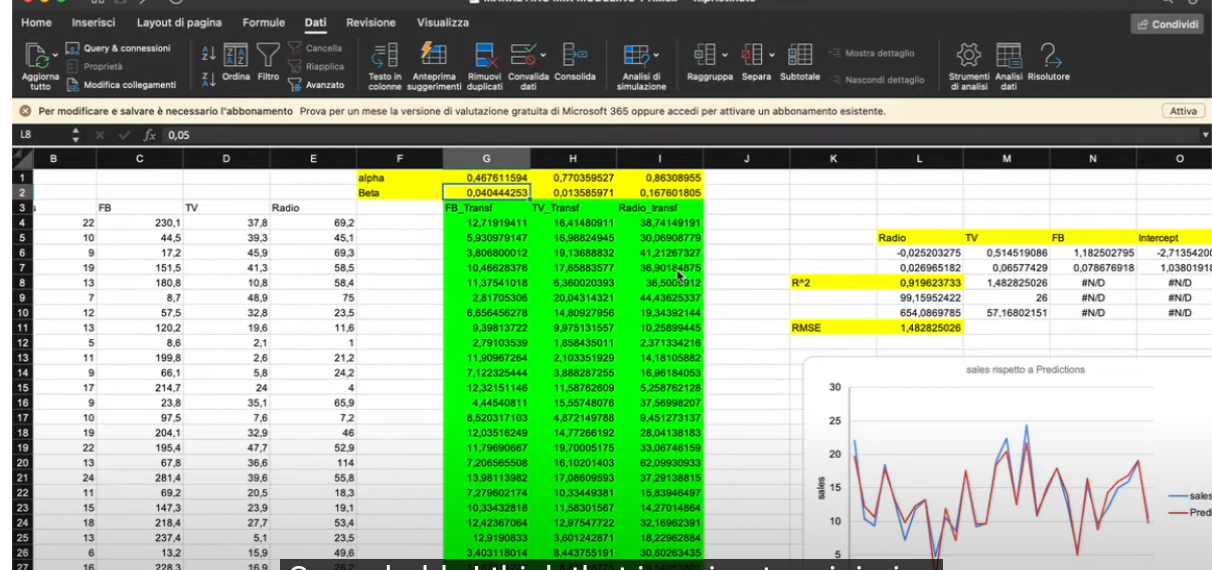

In [25]:
df

,Time,sales,FB,TV,Radio,Date
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10


Valores ótimos de Alpha: [4.25382494e-01 7.30354671e-01 7.64177064e-08]

Valores ótimos de Beta: [3.48010879e-01 7.96108848e-03 1.40067946e-04]

R² otimizado: 0.92807

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import minimize

# Copiar os dados
calculo_5 = df.copy()
calculo_5['FB_Transf'] = 0.0
calculo_5['TV_Transf'] = 0.0
calculo_5['Radio_transf'] = 0.0

# Função para aplicar a transformação de adstock com parâmetros dados
def apply_adstock_transform(df, alphas, betas):
    # Inicializa as primeiras linhas usando os alphas
    df.loc[0, 'FB_Transf'] = df.loc[0, 'FB'] ** alphas[0]
    df.loc[0, 'TV_Transf'] = df.loc[0, 'TV'] ** alphas[1]
    df.loc[0, 'Radio_transf'] = df.loc[0, 'Radio'] ** alphas[2]

    # Aplica transformação de adstock
    for i in range(1, len(df)):
        df.loc[i, 'FB_Transf'] = (df.loc[i - 1, 'FB_Transf'] * betas[0] + df.loc[i, 'FB']) ** alphas[0]
        df.loc[i, 'TV_Transf'] = (df.loc[i - 1, 'TV_Transf'] * betas[1] + df.loc[i, 'TV']) ** alphas[1]
        df.loc[i, 'Radio_transf'] = (df.loc[i - 1, 'Radio_transf'] * betas[2] + df.loc[i, 'Radio']) ** alphas[2]
    
    return df

# Função para calcular o R² negativo (para maximização)
def negative_r_squared(params):
    # Extrair valores de alpha e beta
    alphas = params[:3]  # Primeiros três valores são os alphas
    betas = params[3:]   # Últimos três valores são os betas
    
    # Aplicar transformação
    transformed_df = apply_adstock_transform(calculo_5.copy(), alphas, betas)

    #display(transformed_df)
    
    # Definir variáveis dependentes e independentes
    X = transformed_df[['FB_Transf', 'TV_Transf', 'Radio_transf']]
    y = transformed_df['sales']
    X = sm.add_constant(X)
    
    # Ajustar o modelo de regressão
    model = sm.OLS(y, X).fit()
    
    # Retorna o R² negativo
    return -model.rsquared

# Definir limites para os parâmetros: alphas <= 1 e betas >= 0.00001
bounds = [(0, 1), (0, 1), (0.00001, 1), (0.00001, None), (0.00001, None), (0.00001, None)]

# Otimização usando valores iniciais próximos ao meio dos limites
initial_params = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
result = minimize(negative_r_squared, initial_params, bounds=bounds, method='L-BFGS-B')

# Resultados ótimos
optimal_alphas = result.x[:3]
optimal_betas = result.x[3:]

print("Valores ótimos de Alpha:", optimal_alphas)
print('FB , TV, Radio')
print("Valores ótimos de Alpha:", [f"{alpha:.5f}" for alpha in optimal_alphas])

print()

print('FB , TV, Radio')
print("Valores ótimos de Beta:", optimal_betas)
print("Valores ótimos de Beta:", [f"{beta:.5f}" for beta in optimal_betas])

# Aplicar transformação com parâmetros ótimos e recalcular o modelo final
transformed_df = apply_adstock_transform(calculo_5.copy(), optimal_alphas, optimal_betas)
X = transformed_df[['FB_Transf', 'TV_Transf', 'Radio_transf']]
y = transformed_df['sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Exibir o R² otimizado e o resumo do modelo
print(f"R² otimizado: {model.rsquared:.5f}")
print(model.summary())


transformed_df

Valores ótimos de Alpha: [4.27868905e-01 7.30014952e-01 1.00000000e-05]
FB , TV, Radio
Valores ótimos de Alpha: ['0.42787', '0.73001', '0.00001']

FB , TV, Radio
Valores ótimos de Beta: [3.13168356e-01 6.85671909e-03 1.00000000e-05]
Valores ótimos de Beta: ['0.31317', '0.00686', '0.00001']
R² otimizado: 0.92807
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     111.8
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           5.58e-15
Time:                        18:56:10   Log-Likelihood:                -50.575
No. Observations:                  30   AIC:                             109.2
Df Residuals:                      26   BIC:                             114.8
Df Model:                           3                  

,Time,sales,FB,TV,Radio,Date,FB_Transf,TV_Transf,Radio_transf
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,10.246857,14.177270,1.000042
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,5.226619,14.612134,1.000038
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,3.511850,16.362113,1.000042
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,8.595573,15.154017,1.000041
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,9.301034,5.720717,1.000041
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,2.855310,17.118864,1.000043
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,5.698685,12.815723,1.000032
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,7.810253,8.806118,1.000025
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,2.794819,1.754738,1.000000
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,9.664191,2.015582,1.000031


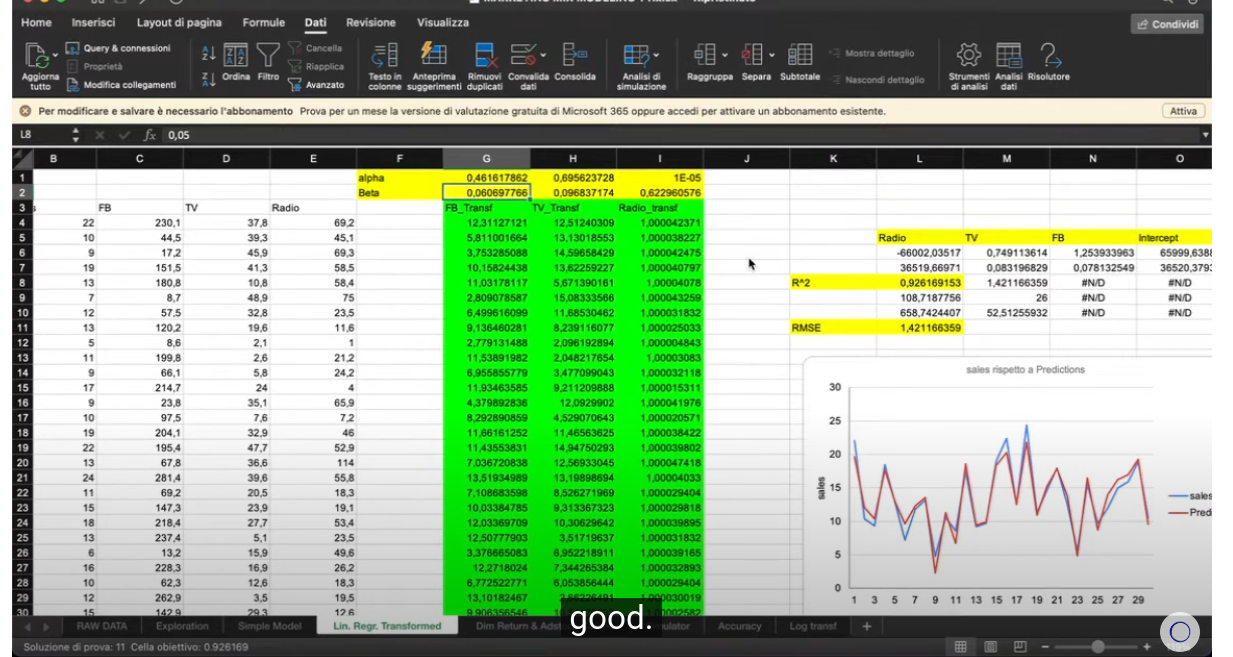

 Otimizar 

 semelhante ao Adstock EP4

Otimizador - primeiro modelo


aumneta a acurácia 

# Predictions

## y=b1x1+b2x2+b3x3+b0

In [31]:
coeficientes_df = model.params.to_dict()  # Converte os coeficientes para dicionário
print(coeficientes_df)

{'const': 67270.34329816343, 'FB_Transf': 1.61083129291493, 'TV_Transf': 0.6496545167786447, 'Radio_transf': -67273.48279689386}


In [32]:
transformed_df['Predictions'] = coeficientes_df['const'] + coeficientes_df['FB_Transf'] * transformed_df['FB_Transf'] + coeficientes_df['TV_Transf'] * transformed_df['TV_Transf'] +  coeficientes_df['Radio_transf'] * transformed_df['Radio_transf']

In [33]:
transformed_df

,Time,sales,FB,TV,Radio,Date,FB_Transf,TV_Transf,Radio_transf,Predictions
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,10.246857,14.177270,1.000042,19.726348
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,5.226619,14.612134,1.000038,12.210125
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,3.511850,16.362113,1.000042,10.295811
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,8.595573,15.154017,1.000041,17.813963
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,9.301034,5.720717,1.000041,12.823107
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,2.855310,17.118864,1.000043,9.676684
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,5.698685,12.815723,1.000032,12.242056
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,7.810253,8.806118,1.000025,13.513538
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,2.794819,1.754738,1.000000,2.502450
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,9.664191,2.015582,1.000031,11.682750


# Cálculo do erro 

In [34]:
transformed_df['Errors'] = abs(transformed_df['sales']- transformed_df['Predictions'])

In [35]:
transformed_df

,Time,sales,FB,TV,Radio,Date,FB_Transf,TV_Transf,Radio_transf,Predictions,Errors
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,10.246857,14.177270,1.000042,19.726348,2.373652
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,5.226619,14.612134,1.000038,12.210125,1.810125
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,3.511850,16.362113,1.000042,10.295811,0.995811
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,8.595573,15.154017,1.000041,17.813963,0.686037
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,9.301034,5.720717,1.000041,12.823107,0.076893
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,2.855310,17.118864,1.000043,9.676684,2.476684
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,5.698685,12.815723,1.000032,12.242056,0.442056
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,7.810253,8.806118,1.000025,13.513538,0.313538
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,2.794819,1.754738,1.000000,2.502450,2.297550
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,9.664191,2.015582,1.000031,11.682750,1.082750


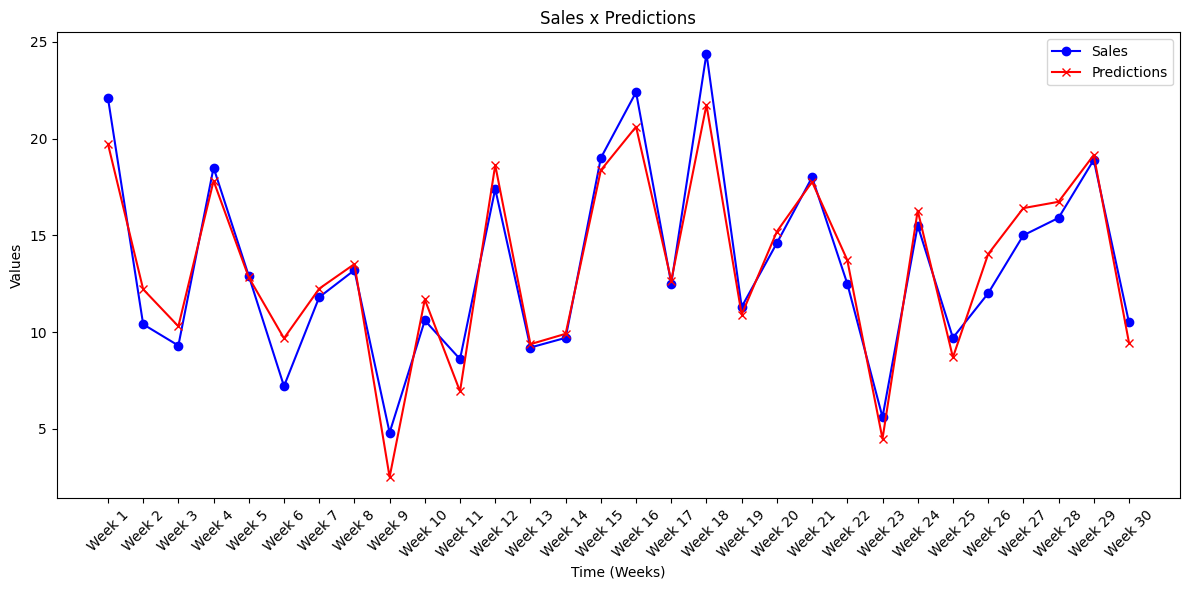

In [36]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(transformed_df["Time"], transformed_df["sales"], marker='o', color='b', label="Sales")
plt.plot(transformed_df["Time"], transformed_df["Predictions"], marker='x', color='r', label="Predictions")



# Melhorar a visualização
plt.xticks(rotation=45)
plt.xlabel("Time (Weeks)")
plt.ylabel("Values")
plt.title("Sales x Predictions")
plt.legend()
plt.tight_layout()  # Para ajustar os rótulos automaticamente

plt.show()

# com o adstock há uma melhor acurácia
# média do erro 

In [37]:
transformed_df['Errors'].mean()

np.float64(1.0662348397355528)

In [39]:
print('A média do Erro da previsão de vendas é de {}'.format(transformed_df['Errors'].mean()))

print()

print('A média das vendas (sales) é {}'.format(transformed_df['sales'].mean()))

print()
print('A porcentatem do Erro é de {:.4f} %'.format((transformed_df['Errors'].mean()/transformed_df['sales'].mean())*100))

A média do Erro da previsão de vendas é de 1.0662348397355528

A média das vendas (sales) é 13.449999999999998

A porcentatem do Erro é de 7.9274 %
